<a href="https://colab.research.google.com/github/FebaAch/Machine_learning_final/blob/main/Final_Pneumonia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


In [ ]:
from tensorflow.keras.applications import DenseNet121


In [ ]:

from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
import matplotlib.pyplot as plt
import random
import cv2
import os

import numpy as np



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

classes = ['NORMAL', 'PNEUMONIA']
folders = ['train', 'val', 'test']
base_path = '/content/drive/MyDrive/ColabNotebooks/Pneumonia_Project/Chest_Xray_final'

for cls in classes:
    for folder in folders:
        path = os.path.join(base_path, folder, cls)
        print(f"{path}: exists? {os.path.exists(path)}, files: {len(os.listdir(path)) if os.path.exists(path) else 'N/A'}")


/content/drive/MyDrive/ColabNotebooks/Pneumonia_Project/Chest_Xray_final/train/NORMAL: exists? True, files: 1109
/content/drive/MyDrive/ColabNotebooks/Pneumonia_Project/Chest_Xray_final/val/NORMAL: exists? True, files: 317
/content/drive/MyDrive/ColabNotebooks/Pneumonia_Project/Chest_Xray_final/test/NORMAL: exists? True, files: 159
/content/drive/MyDrive/ColabNotebooks/Pneumonia_Project/Chest_Xray_final/train/PNEUMONIA: exists? True, files: 3016
/content/drive/MyDrive/ColabNotebooks/Pneumonia_Project/Chest_Xray_final/val/PNEUMONIA: exists? True, files: 861
/content/drive/MyDrive/ColabNotebooks/Pneumonia_Project/Chest_Xray_final/test/PNEUMONIA: exists? True, files: 432


In [ ]:
# import os
# import random
# import shutil

# random.seed(42)

# # Paths and classes
# base_path = '/content/drive/MyDrive/ColabNotebooks/Pneumonia_Project/chest_xray'
# folders = ['train', 'val', 'test']
# classes = ['NORMAL', 'PNEUMONIA']

# output_dir = '/content/drive/MyDrive/ColabNotebooks/Pneumonia_Project/Chest_Xray_final'
# splits = ['train', 'val', 'test']

# # Create folder structure
# for split in splits:
#     for cls in classes:
#         os.makedirs(os.path.join(output_dir, split, cls), exist_ok=True)

# # Function to combine, shuffle, split, and copy
# def combine_split_copy(cls_name, train_ratio=0.7, val_ratio=0.2, test_ratio=0.1):
#     all_files = []
#     # Collect all files from train, val, test
#     for folder in folders:
#         cls_folder = os.path.join(base_path, folder, cls_name)
#         all_files.extend([os.path.join(cls_folder, f) for f in os.listdir(cls_folder)])

#     # Shuffle
#     random.shuffle(all_files)

#     total = len(all_files)
#     train_end = int(total * train_ratio)
#     val_end = train_end + int(total * val_ratio)

#     train_files = all_files[:train_end]
#     val_files = all_files[train_end:val_end]
#     test_files = all_files[val_end:]

#     # Copy files
#     for f in train_files:
#         shutil.copy(f, os.path.join(output_dir, 'train', cls_name))
#     for f in val_files:
#         shutil.copy(f, os.path.join(output_dir, 'val', cls_name))
#     for f in test_files:
#         shutil.copy(f, os.path.join(output_dir, 'test', cls_name))

#     print(f"{cls_name}: {len(train_files)} train, {len(val_files)} val, {len(test_files)} test")

# # Apply to both classes
# for cls in classes:
#     combine_split_copy(cls)


In [ ]:

base_dir = "/content/drive/MyDrive/ColabNotebooks/Pneumonia_Project/Chest_Xray_final"

splits = ["train", "val", "test"]
classes = ["NORMAL", "PNEUMONIA"]

# Count corrupted images
def is_corrupted(path):
    try:
        img = cv2.imread(path)
        return img is None
    except:
        return True

corrupted = []

for split in splits:
    for cls in classes:
        folder = os.path.join(base_dir, split, cls)
        for file in os.listdir(folder):
            path = os.path.join(folder, file)
            if is_corrupted(path):
                corrupted.append(path)

print("Total corrupted images:", len(corrupted))




Total corrupted images: 0


In [ ]:
base_dir = "/content/drive/MyDrive/ColabNotebooks/Pneumonia_Project/Chest_Xray_final"

In [ ]:

splits = ["train", "val", "test"]
classes = ["NORMAL", "PNEUMONIA"]

In [ ]:
counts = {}

for split in splits:
    print(f"\n--- {split.upper()} ---")
    counts[split] = {}
    for cls in classes:
        folder = os.path.join(base_dir, split, cls)
        num_files = len(os.listdir(folder))
        counts[split][cls] = num_files
        print(f"{cls}: {num_files} images")


--- TRAIN ---
NORMAL: 1109 images
PNEUMONIA: 3016 images

--- VAL ---
NORMAL: 317 images
PNEUMONIA: 861 images

--- TEST ---
NORMAL: 159 images
PNEUMONIA: 432 images


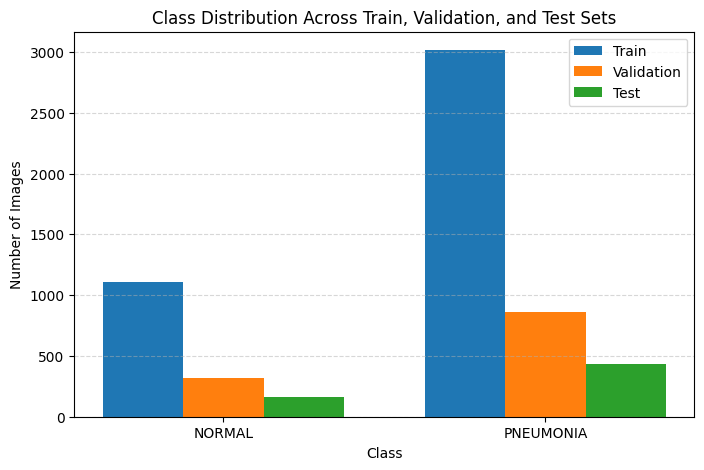

In [ ]:

# Prepare data
splits = ["train", "val", "test"]
classes = ["NORMAL", "PNEUMONIA"]

train_vals = [counts["train"]["NORMAL"], counts["train"]["PNEUMONIA"]]
val_vals   = [counts["val"]["NORMAL"], counts["val"]["PNEUMONIA"]]
test_vals  = [counts["test"]["NORMAL"], counts["test"]["PNEUMONIA"]]

x = np.arange(len(classes))  # x-axis labels
width = 0.25  # bar width

# Plot
plt.figure(figsize=(8,5))
plt.bar(x - width, train_vals, width, label='Train')
plt.bar(x, val_vals, width, label='Validation')
plt.bar(x + width, test_vals, width, label='Test')

plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.title("Class Distribution Across Train, Validation, and Test Sets")
plt.xticks(x, classes)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


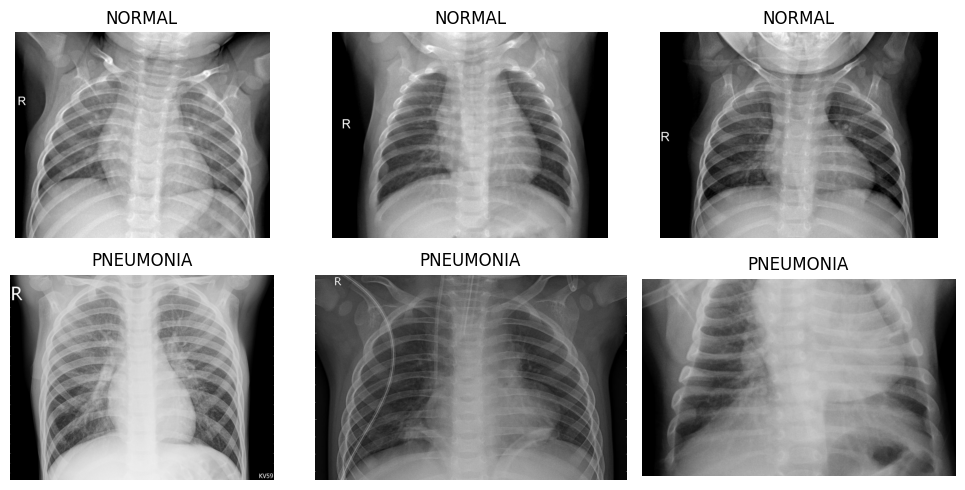

In [ ]:
# Display 3 random images per class from TRAIN set
plt.figure(figsize=(10,5))

for i, cls in enumerate(classes):
    folder = os.path.join(base_dir, "train", cls)
    sample_files = random.sample(os.listdir(folder), 3)  # 3 random images

    for j, file in enumerate(sample_files):
        img_path = os.path.join(folder, file)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
        plt.subplot(2,3,i*3 + j + 1)
        plt.imshow(img)
        plt.title(f"{cls}")
        plt.axis("off")

plt.tight_layout()
plt.show()

/tmp/ipython-input-63094385.py:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([heights, widths], labels=['Heights', 'Widths'])


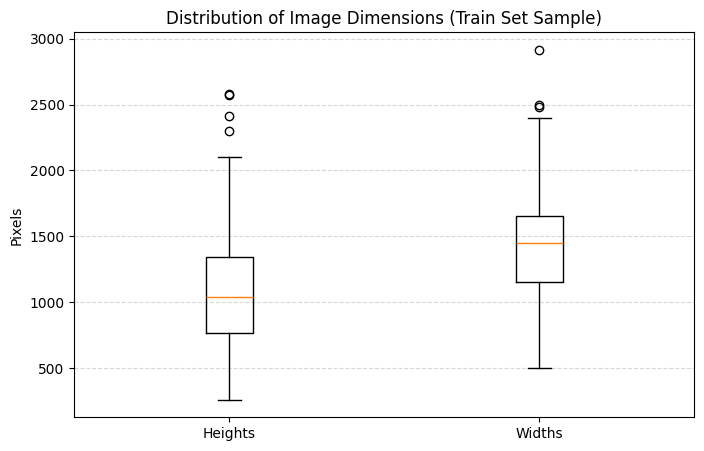

In [ ]:
heights, widths = [], []

# Take a sample of TRAIN images to save time
for cls in classes:
    folder = os.path.join(base_dir, "train", cls)
    sample_files = random.sample(os.listdir(folder), 100)  # 100 images per class

    for file in sample_files:
        img_path = os.path.join(folder, file)
        img = cv2.imread(img_path)
        if img is not None:
            h, w = img.shape[:2]
            heights.append(h)
            widths.append(w)

# Box plot
plt.figure(figsize=(8,5))
plt.boxplot([heights, widths], labels=['Heights', 'Widths'])
plt.title("Distribution of Image Dimensions (Train Set Sample)")
plt.ylabel("Pixels")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


The boxplot shows that the majority of chest X-ray images have heights and widths within a similar range, but some variation exists. This indicates that resizing all images to a standard input size (224×224 pixels) is necessary before feeding them into CNNs like ResNet50 and DenseNet121

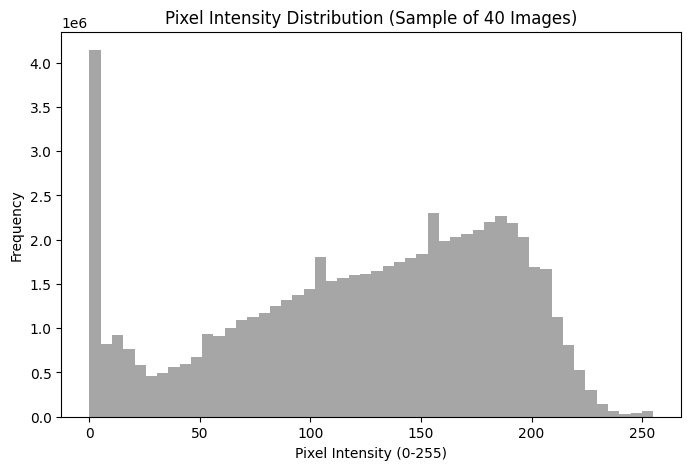

In [ ]:
pixel_values = []

# Sample 20 images per class from TRAIN set
for cls in classes:
    folder = os.path.join(base_dir, "train", cls)
    sample_files = random.sample(os.listdir(folder), 20)  # 20 per class
    for file in sample_files:
        img_path = os.path.join(folder, file)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # convert to grayscale
        if img is not None:
            pixel_values.extend(img.flatten())  # flatten pixels into list

# Plot histogram
plt.figure(figsize=(8,5))
plt.hist(pixel_values, bins=50, color='gray', alpha=0.7)
plt.title("Pixel Intensity Distribution (Sample of 40 Images)")
plt.xlabel("Pixel Intensity (0-255)")
plt.ylabel("Frequency")
plt.show()

The pixel intensity histogram shows that chest X-rays are generally dark with bright highlights for bones and lungs. Some images are brighter or darker than average, indicating that pixel normalization will be applied during preprocessing to improve model training and convergence

DATA PREPROCESSING
CNNs require 224×224 input size.
Pixel values should be scaled to 0–1.


In [ ]:

# Data augmentation for train set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # internal split if needed
)

# Only rescale for validation/test
val_test_datagen = ImageDataGenerator(rescale=1./255)


In [ ]:
batch_size = 32
target_size = (224, 224)  # CNN input size

# Training generator (with augmentation)
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/ColabNotebooks/Pneumonia_Project/Chest_Xray_final/train',
    target_size=target_size,
    batch_size=batch_size,
    class_mode='binary',   # 0=NORMAL, 1=PNEUMONIA
    shuffle=True,
    color_mode='rgb'
)

# Validation generator (just rescaling)
val_generator = val_test_datagen.flow_from_directory(
    '/content/drive/MyDrive/ColabNotebooks/Pneumonia_Project/Chest_Xray_final/val',
    target_size=target_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False,
    color_mode='rgb'
)

# Test generator (just rescaling)
test_generator = val_test_datagen.flow_from_directory(
    '/content/drive/MyDrive/ColabNotebooks/Pneumonia_Project/Chest_Xray_final/test',
    target_size=target_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False,
    color_mode='rgb'
)


Found 4125 images belonging to 2 classes.
Found 1178 images belonging to 2 classes.
Found 591 images belonging to 2 classes.


FOR NORMAL

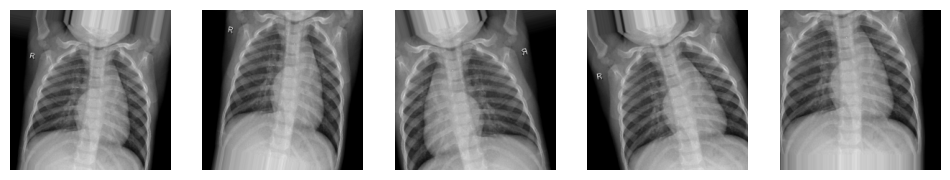

In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import random

# Path to dataset
data_dir = '/content/drive/MyDrive/ColabNotebooks/Pneumonia_Project/Chest_Xray_final'

# Classes
classes = ['NORMAL', 'PNEUMONIA']

# Take a random sample image
cls = 'NORMAL'
folder = os.path.join(data_dir, 'train', cls)
file = random.choice(os.listdir(folder))
img_path = os.path.join(folder, file)

# Read as grayscale and normalize
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (224,224))
img = img.astype('float32') / 255.0

# Convert to 3 channels for CNN
img_3ch = np.stack((img,)*3, axis=-1)

# Data augmentation generator
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Prepare for generator
img_3ch = img_3ch.reshape((1,) + img_3ch.shape)  # (1, 224,224,3)

# Generate 5 augmented images
plt.figure(figsize=(12,3))
for i, batch in enumerate(datagen.flow(img_3ch, batch_size=1)):
    plt.subplot(1,5,i+1)
    plt.imshow(batch[0])
    plt.axis('off')
    if i >= 4:  # show only 5
        break
plt.show()


FOR PNEUMONIA

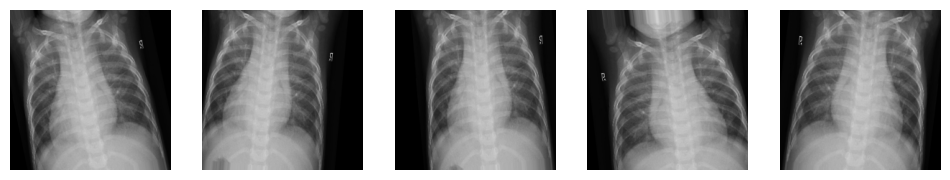

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import matplotlib.pyplot as plt
import numpy as np
import os, random
import cv2

# Pick a random Pneumonia image
cls = 'PNEUMONIA'
folder = os.path.join(base_dir, 'train', cls)
file = random.choice(os.listdir(folder))
img_path = os.path.join(folder, file)

# Read as grayscale and resize
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (224,224))

# Convert to 3 channels (RGB)
img_3ch = np.stack((img,)*3, axis=-1)
img_3ch = img_3ch.astype('float32') / 255.0
img_3ch = img_3ch.reshape((1,) + img_3ch.shape)  # (1, 224,224,3)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Generate 5 augmented images
plt.figure(figsize=(12,3))
for i, batch in enumerate(datagen.flow(img_3ch, batch_size=1)):
    plt.subplot(1,5,i+1)
    plt.imshow(batch[0])
    plt.axis('off')
    if i >= 4:  # show only 5
        break
plt.show()


The code loads a random grayscale X-ray image, resizes it to 224×224 pixels, normalizes the pixel values, and converts it to 3 channels for compatibility with CNNs.
It sets up a data augmentation generator that applies random transformations like rotation, zoom, shift, and horizontal flip.
Finally, it generates and displays 5 augmented versions of the image to visualize how the training data will be varied during model training.

We do this to improve model training.
By visualizing augmented images, we can confirm that the transformations (rotation, flip, zoom, etc.) look realistic and don’t distort the X-rays unnaturally.
Data augmentation helps the model generalize better, because it learns to recognize pneumonia under slightly different conditions instead of memorizing exact images.
It also artificially increases the effective size of the training set, which is especially important when the dataset is limited or imbalanced.

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

labels = train_generator.classes
class_weights = compute_class_weight('balanced', classes=np.unique(labels), y=labels)
class_weights_dict = dict(enumerate(class_weights))
print("Class weights:", class_weights_dict)


Class weights: {0: np.float64(1.8597835888187557), 1: np.float64(0.6838527851458885)}


Since dataset is imbalanced (more PNEUMONIA than NORMAL), we can compute class weights to give more importance to the minority class during training.
This helps the model avoid being biased toward the majority class.



In [ ]:
cnn_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

# Define callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-6)

# Compile model
cnn_model.compile(optimizer=Adam(1e-4),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

# Train model
cnn_history = cnn_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    class_weight=class_weights_dict,
    callbacks=[early_stop, reduce_lr]
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 101s 723ms/step - accuracy: 0.6545 - loss: 0.6032 - val_accuracy: 0.8294 - val_loss: 0.4251 - learning_rate: 1.0000e-04
Epoch 2/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 87s 671ms/step - accuracy: 0.8699 - loss: 0.3118 - val_accuracy: 0.7402 - val_loss: 0.5620 - learning_rate: 1.0000e-04
Epoch 3/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 87s 675ms/step - accuracy: 0.8739 - loss: 0.3022 - val_accuracy: 0.9261 - val_loss: 0.2062 - learning_rate: 1.0000e-04
Epoch 4/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 87s 671ms/step - accuracy: 0.8776 - loss: 0.3068 - val_accuracy: 0.8778 - val_loss: 0.2870 - learning_rate: 1.0000e-04
Epoch 5/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 87s 674ms/step - accuracy: 0.8901 - loss: 0.2730 - val_accuracy: 0.8795 - val_loss: 0.3052 - learning_rate: 1.0000e-04
Epoch 6/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 87s 671ms/step - accuracy: 0.8893 - loss: 0.2699 - val_accuracy: 0.8336 - val_loss: 0.3818 - learning_rate: 2.0000e-05


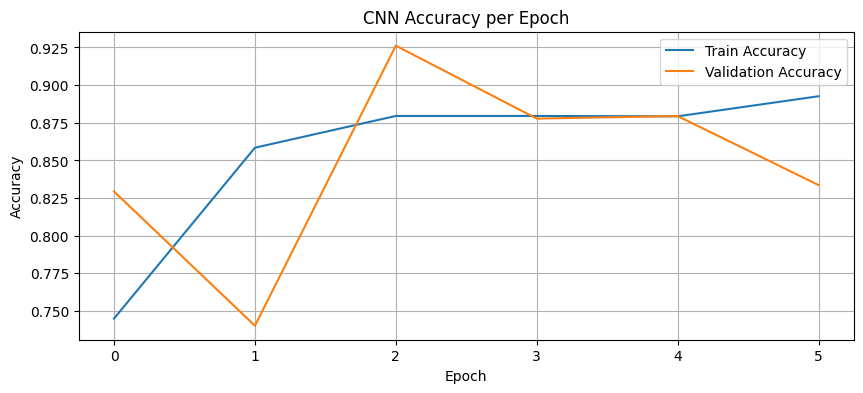

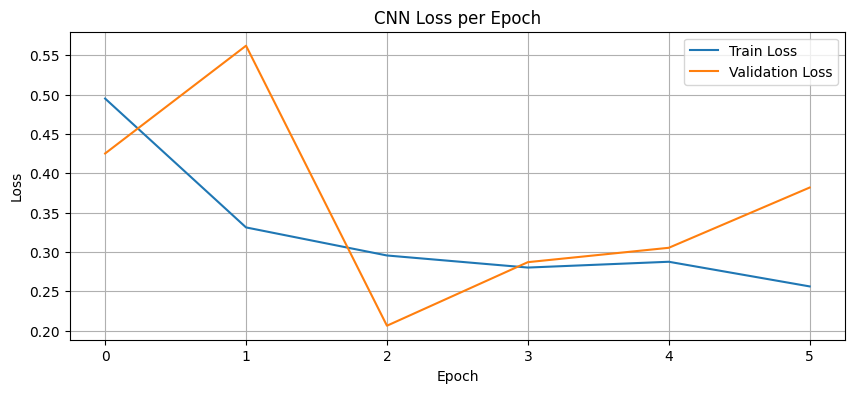

In [ ]:
# Plot Accuracy
plt.figure(figsize=(10,4))
plt.plot(cnn_history.history['accuracy'], label='Train Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot Loss
plt.figure(figsize=(10,4))
plt.plot(cnn_history.history['loss'], label='Train Loss')
plt.plot(cnn_history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 326ms/step


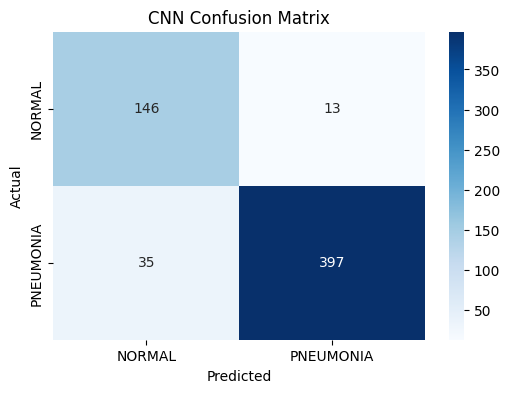

CNN Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.81      0.92      0.86       159
   PNEUMONIA       0.97      0.92      0.94       432

    accuracy                           0.92       591
   macro avg       0.89      0.92      0.90       591
weighted avg       0.92      0.92      0.92       591



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np

# Predict on test set
y_pred = cnn_model.predict(test_generator)
y_pred_classes = np.where(y_pred > 0.5, 1, 0)
y_true = test_generator.classes

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('CNN Confusion Matrix')
plt.show()

# Classification report
print("CNN Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=classes))


In [ ]:
test_loss, test_acc = cnn_model.evaluate(test_generator, steps=len(test_generator))
print(f"CNN Test Accuracy: {test_acc:.4f}")
print(f"CNN Test Loss: {test_loss:.4f}")


19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 312ms/step - accuracy: 0.9155 - loss: 0.2453
CNN Test Accuracy: 0.9188
CNN Test Loss: 0.2146


RES-NET modelling

In [ ]:
# Load pre-trained ResNet50 without top layers
resnet_base = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))

# Freeze convolutional layers
for layer in resnet_base.layers:
    layer.trainable = False

# Add custom top layers for binary classification
x = resnet_base.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

resnet_model = Model(inputs=resnet_base.input, outputs=predictions)
\

# Compile the model
resnet_model.compile(optimizer=Adam(learning_rate=1e-4),
                     loss='binary_crossentropy',
                     metrics=['accuracy'])


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
# Unified callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-6)


In [ ]:
# Train ResNet50
resnet_history = resnet_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    class_weight=class_weights_dict,
    callbacks=[early_stop, reduce_lr]
)


Epoch 1/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 112s 775ms/step - accuracy: 0.5081 - loss: 0.7270 - val_accuracy: 0.8090 - val_loss: 0.6712 - learning_rate: 1.0000e-04
Epoch 2/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 87s 678ms/step - accuracy: 0.5303 - loss: 0.6941 - val_accuracy: 0.7334 - val_loss: 0.6014 - learning_rate: 1.0000e-04
Epoch 3/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 88s 680ms/step - accuracy: 0.6164 - loss: 0.6672 - val_accuracy: 0.8065 - val_loss: 0.6152 - learning_rate: 1.0000e-04
Epoch 4/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 87s 678ms/step - accuracy: 0.6647 - loss: 0.6470 - val_accuracy: 0.7980 - val_loss: 0.6263 - learning_rate: 1.0000e-04
Epoch 5/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 87s 676ms/step - accuracy: 0.7052 - loss: 0.6324 - val_accuracy: 0.7725 - val_loss: 0.6400 - learning_rate: 2.0000e-05


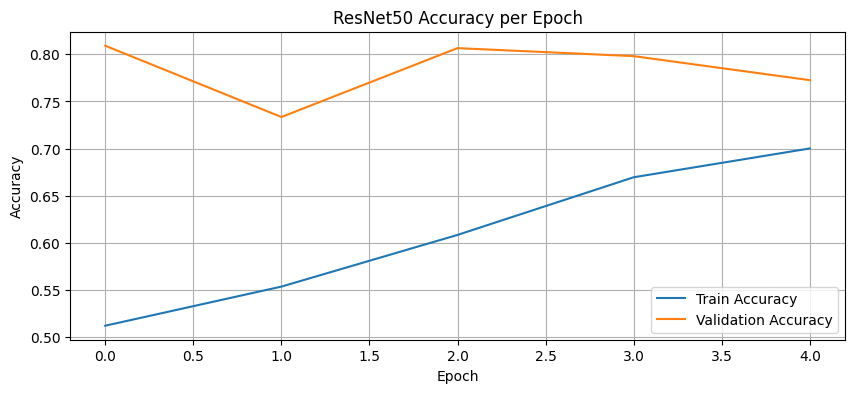

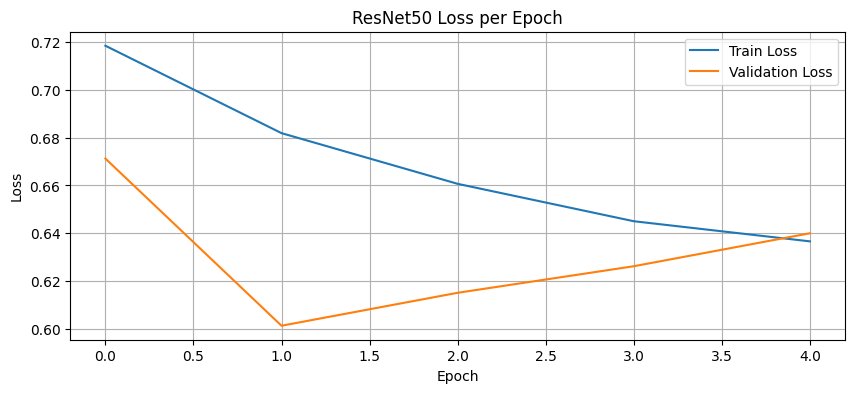

In [ ]:
history = resnet_history

# Plot Accuracy
plt.figure(figsize=(10,4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('ResNet50 Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot Loss
plt.figure(figsize=(10,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('ResNet50 Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
test_loss, test_acc = resnet_model.evaluate(test_generator, steps=len(test_generator))
print(f"ResNet50 Test Accuracy: {test_acc:.4f}")
print(f"ResNet50 Test Loss: {test_loss:.4f}")


19/19 ━━━━━━━━━━━━━━━━━━━━ 9s 475ms/step - accuracy: 0.4210 - loss: 0.6976
ResNet50 Test Accuracy: 0.7293
ResNet50 Test Loss: 0.6034


19/19 ━━━━━━━━━━━━━━━━━━━━ 13s 463ms/step


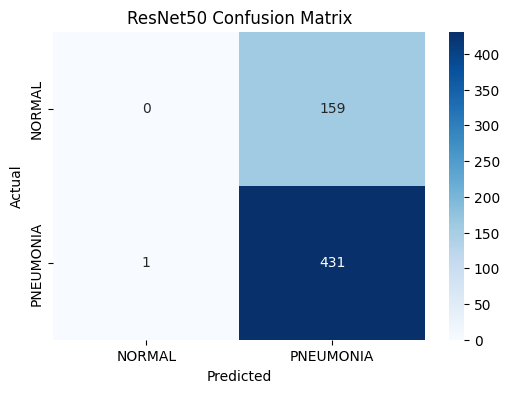

              precision    recall  f1-score   support

      NORMAL       0.00      0.00      0.00       159
   PNEUMONIA       0.73      1.00      0.84       432

    accuracy                           0.73       591
   macro avg       0.37      0.50      0.42       591
weighted avg       0.53      0.73      0.62       591



In [ ]:
# Predict on test set
y_pred = resnet_model.predict(test_generator)
y_pred_classes = np.where(y_pred > 0.5, 1, 0)
y_true = test_generator.classes

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('ResNet50 Confusion Matrix')
plt.show()

# Classification report
print(classification_report(y_true, y_pred_classes, target_names=classes))


In [ ]:
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224,224,3))

# Freeze the base layers initially
for layer in base_model.layers:
    layer.trainable = False

# Add custom top layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
predictions = Dense(1, activation='sigmoid')(x)

densenet_model = Model(inputs=base_model.input, outputs=predictions)

# Compile
densenet_model.compile(optimizer=Adam(learning_rate=1e-4),
                      loss='binary_crossentropy',
                      metrics=['accuracy'])

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
# Train DenseNet121
densenet_history = densenet_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    class_weight=class_weights_dict,
    callbacks=[early_stop, reduce_lr]
)

Epoch 1/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 151s 970ms/step - accuracy: 0.6017 - loss: 0.7709 - val_accuracy: 0.7699 - val_loss: 0.4919 - learning_rate: 1.0000e-04
Epoch 2/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 88s 682ms/step - accuracy: 0.7712 - loss: 0.4689 - val_accuracy: 0.8396 - val_loss: 0.3894 - learning_rate: 1.0000e-04
Epoch 3/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 88s 682ms/step - accuracy: 0.8214 - loss: 0.3997 - val_accuracy: 0.8497 - val_loss: 0.3626 - learning_rate: 1.0000e-04
Epoch 4/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 88s 684ms/step - accuracy: 0.8386 - loss: 0.3627 - val_accuracy: 0.8548 - val_loss: 0.3604 - learning_rate: 1.0000e-04
Epoch 5/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 88s 681ms/step - accuracy: 0.8361 - loss: 0.3607 - val_accuracy: 0.8752 - val_loss: 0.3179 - learning_rate: 1.0000e-04
Epoch 6/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 87s 678ms/step - accuracy: 0.8456 - loss: 0.3464 - val_accuracy: 0.8854 - val_loss: 0.2791 - learning_rate: 1.0000e-04
Epoch 7/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 88s 6

In [ ]:
test_loss, test_acc = densenet_model.evaluate(test_generator, steps=len(test_generator))
print(f"DenseNet121 Test Accuracy: {test_acc:.4f}")
print(f"DenseNet121 Test Loss: {test_loss:.4f}")


19/19 ━━━━━━━━━━━━━━━━━━━━ 17s 885ms/step - accuracy: 0.9083 - loss: 0.2535
DenseNet121 Test Accuracy: 0.8748
DenseNet121 Test Loss: 0.3070


19/19 ━━━━━━━━━━━━━━━━━━━━ 28s 905ms/step


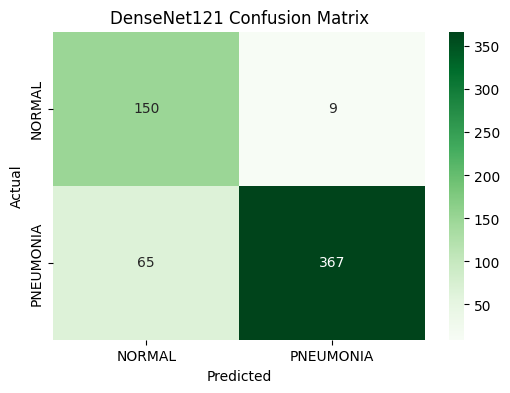

              precision    recall  f1-score   support

      NORMAL       0.70      0.94      0.80       159
   PNEUMONIA       0.98      0.85      0.91       432

    accuracy                           0.87       591
   macro avg       0.84      0.90      0.86       591
weighted avg       0.90      0.87      0.88       591



In [ ]:
y_pred = densenet_model.predict(test_generator)
y_pred_classes = np.where(y_pred > 0.5, 1, 0)
y_true = test_generator.classes

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('DenseNet121 Confusion Matrix')
plt.show()

print(classification_report(y_true, y_pred_classes, target_names=classes))


Observations:
DenseNet121 outperforms ResNet50 on the test set, both in accuracy and lower loss.
DenseNet121’s better feature reuse and connectivity may help it generalize better on your pneumonia dataset.
ResNet50 is still strong, but DenseNet121 is slightly more accurate for this task.

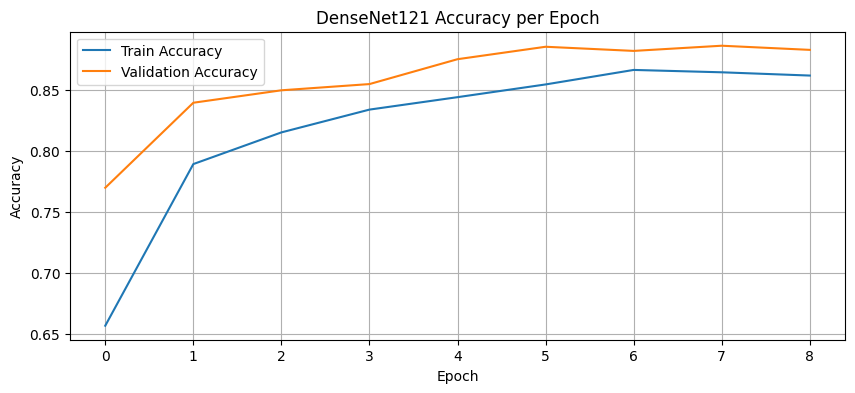

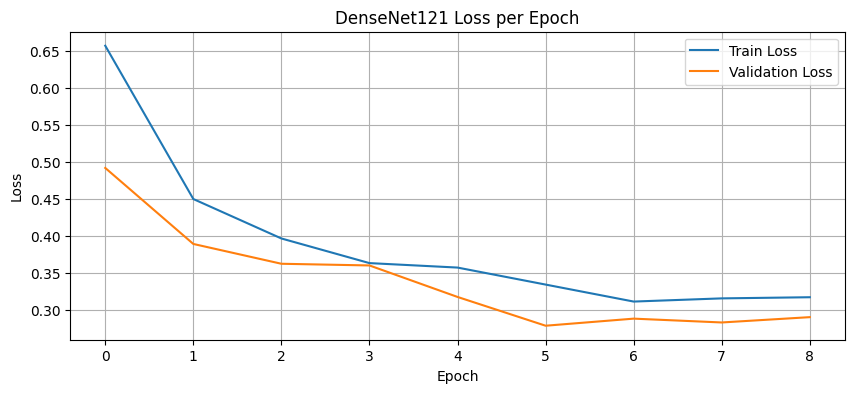

In [ ]:
# DenseNet121 training history
history = densenet_history

# Plot Accuracy
plt.figure(figsize=(10,4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('DenseNet121 Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot Loss
plt.figure(figsize=(10,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('DenseNet121 Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

# ANN model
ann_model = Sequential([
    Flatten(input_shape=(224,224,3)),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Compile
ann_model.compile(optimizer=Adam(1e-4),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Use same callbacks
ann_history = ann_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    class_weight=class_weights_dict,
    callbacks=[early_stop, reduce_lr]
)


Epoch 1/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 93s 695ms/step - accuracy: 0.5211 - loss: 2.9065 - val_accuracy: 0.3990 - val_loss: 0.6977 - learning_rate: 1.0000e-04
Epoch 2/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 86s 670ms/step - accuracy: 0.6574 - loss: 0.6917 - val_accuracy: 0.7309 - val_loss: 0.6920 - learning_rate: 1.0000e-04
Epoch 3/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 87s 676ms/step - accuracy: 0.7413 - loss: 0.6845 - val_accuracy: 0.7309 - val_loss: 0.6920 - learning_rate: 1.0000e-04
Epoch 4/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 86s 669ms/step - accuracy: 0.7303 - loss: 0.6913 - val_accuracy: 0.7309 - val_loss: 0.6921 - learning_rate: 1.0000e-04
Epoch 5/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 87s 671ms/step - accuracy: 0.7258 - loss: 0.6975 - val_accuracy: 0.7309 - val_loss: 0.6921 - learning_rate: 2.0000e-05


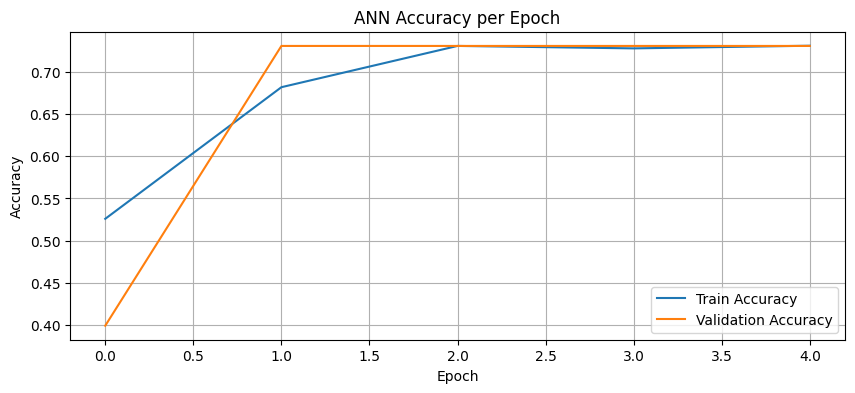

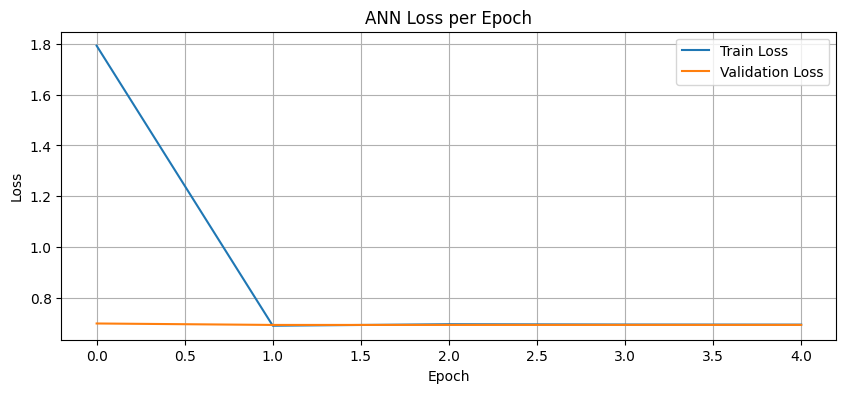

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(ann_history.history['accuracy'], label='Train Accuracy')
plt.plot(ann_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('ANN Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10,4))
plt.plot(ann_history.history['loss'], label='Train Loss')
plt.plot(ann_history.history['val_loss'], label='Validation Loss')
plt.title('ANN Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
test_loss, test_acc = ann_model.evaluate(test_generator, steps=len(test_generator))
print(f"ANN Test Accuracy: {test_acc:.4f}")
print(f"ANN Test Loss: {test_loss:.4f}")


19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 324ms/step - accuracy: 0.4224 - loss: 0.6935
ANN Test Accuracy: 0.7310
ANN Test Loss: 0.6920


The ANN model struggles with image data because it cannot capture spatial patterns effectively. Using a CNN or pretrained model like ResNet/DenseNet would better extract features from X-rays. Additionally, addressing class imbalance with class weights or oversampling can help the model learn both classes more reliably.

19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 296ms/step


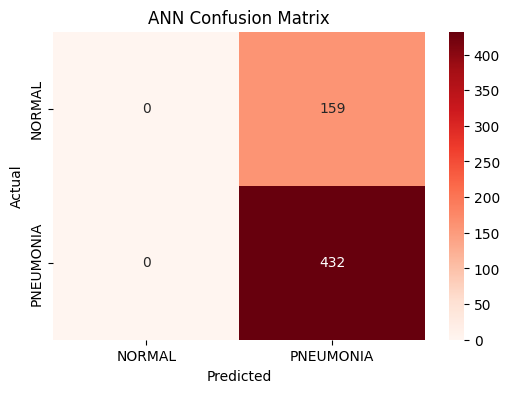

              precision    recall  f1-score   support

      NORMAL       0.00      0.00      0.00       159
   PNEUMONIA       0.73      1.00      0.84       432

    accuracy                           0.73       591
   macro avg       0.37      0.50      0.42       591
weighted avg       0.53      0.73      0.62       591



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
y_pred = ann_model.predict(test_generator)
y_pred_classes = np.where(y_pred > 0.5, 1, 0)
y_true = test_generator.classes

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds',
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('ANN Confusion Matrix')
plt.show()

print(classification_report(y_true, y_pred_classes, target_names=classes))


20 Epochs - Resnet

In [ ]:
resnet_base_20 = ResNet50(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)

for layer in resnet_base_20.layers:
    layer.trainable = False

x = resnet_base_20.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

resnet_model_20 = Model(
    inputs=resnet_base_20.input,
    outputs=output
)


In [ ]:
resnet_model_20.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [ ]:
early_stop_20 = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

reduce_lr_20 = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=2,
    min_lr=1e-6
)


In [ ]:
resnet_history_20 = resnet_model_20.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    class_weight=class_weights_dict,
    callbacks=[early_stop_20, reduce_lr_20]
)


Epoch 1/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 105s 744ms/step - accuracy: 0.5083 - loss: 0.7345 - val_accuracy: 0.6367 - val_loss: 0.6813 - learning_rate: 1.0000e-04
Epoch 2/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 87s 677ms/step - accuracy: 0.5656 - loss: 0.6851 - val_accuracy: 0.4941 - val_loss: 0.6885 - learning_rate: 1.0000e-04
Epoch 3/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 88s 685ms/step - accuracy: 0.6115 - loss: 0.6559 - val_accuracy: 0.7054 - val_loss: 0.6587 - learning_rate: 1.0000e-04
Epoch 4/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 88s 682ms/step - accuracy: 0.6703 - loss: 0.6485 - val_accuracy: 0.7148 - val_loss: 0.6489 - learning_rate: 1.0000e-04
Epoch 5/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 88s 680ms/step - accuracy: 0.7125 - loss: 0.6214 - val_accuracy: 0.7886 - val_loss: 0.6122 - learning_rate: 1.0000e-04
Epoch 6/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 88s 683ms/step - accuracy: 0.7445 - loss: 0.6139 - val_accuracy: 0.8031 - val_loss: 0.5788 - learning_rate: 1.0000e-04
Epoch 7/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 87s 6

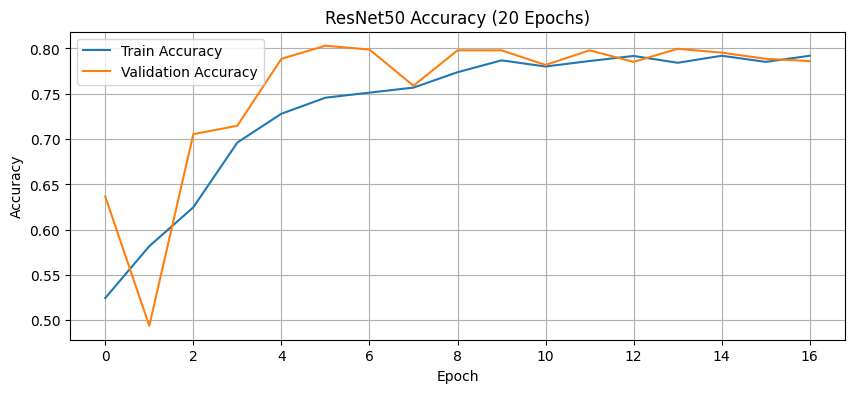

In [ ]:
# Accuracy
plt.figure(figsize=(10,4))
plt.plot(resnet_history_20.history['accuracy'], label='Train Accuracy')
plt.plot(resnet_history_20.history['val_accuracy'], label='Validation Accuracy')
plt.title('ResNet50 Accuracy (20 Epochs)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


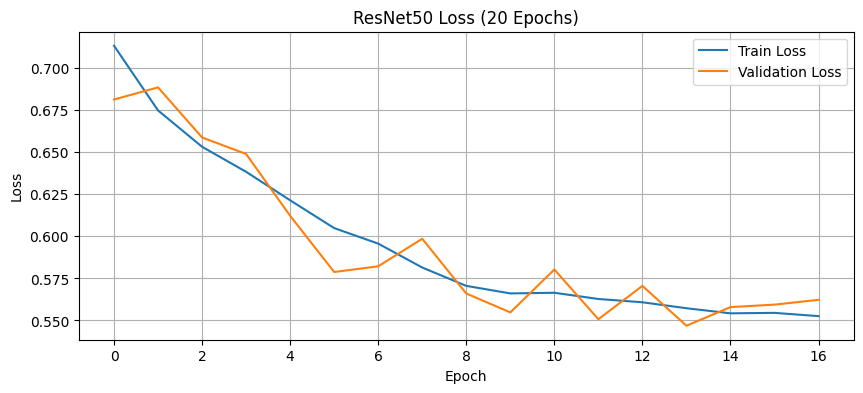

In [ ]:
# Loss
plt.figure(figsize=(10,4))
plt.plot(resnet_history_20.history['loss'], label='Train Loss')
plt.plot(resnet_history_20.history['val_loss'], label='Validation Loss')
plt.title('ResNet50 Loss (20 Epochs)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
test_loss_20, test_acc_20 = resnet_model_20.evaluate(
    test_generator,
    steps=len(test_generator)
)

print(f"ResNet50 (20 Epochs) Test Accuracy: {test_acc_20:.4f}")
print(f"ResNet50 (20 Epochs) Test Loss: {test_loss_20:.4f}")


19/19 ━━━━━━━━━━━━━━━━━━━━ 8s 397ms/step - accuracy: 0.7928 - loss: 0.5504
ResNet50 (20 Epochs) Test Accuracy: 0.7851
ResNet50 (20 Epochs) Test Loss: 0.5553


In [ ]:
y_pred_20 = resnet_model_20.predict(test_generator)
y_pred_classes_20 = np.where(y_pred_20 > 0.5, 1, 0)
y_true_20 = test_generator.classes

cm_20 = confusion_matrix(y_true_20, y_pred_classes_20)

plt.figure(figsize=(6,4))
sns.heatmap(
    cm_20,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=classes,
    yticklabels=classes
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('ResNet50 Confusion Matrix (20 Epochs)')
plt.show()


19/19 ━━━━━━━━━━━━━━━━━━━━ 13s 457ms/step


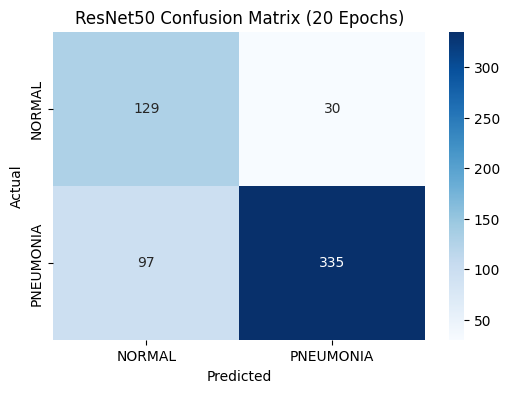

In [ ]:
cm_20 = confusion_matrix(y_true_20, y_pred_classes_20)

plt.figure(figsize=(6,4))
sns.heatmap(
    cm_20,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=classes,
    yticklabels=classes
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('ResNet50 Confusion Matrix (20 Epochs)')
plt.show()


In [ ]:
!pip install -q keras-tuner

from kerastuner import HyperModel
from kerastuner.tuners import RandomSearch
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 kB 3.8 MB/s eta 0:00:00


/tmp/ipython-input-1940806379.py:3: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import HyperModel


In [ ]:

# Define a HyperModel
class ResNetHyperModel(HyperModel):
    def build(self, hp):
        base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))
        for layer in base_model.layers:
            layer.trainable = False

        x = base_model.output
        x = GlobalAveragePooling2D()(x)

        # Tune number of units
        units = hp.Choice('units', [64, 128, 256])
        x = Dense(units, activation='relu')(x)

        # Tune dropout
        dropout_rate = hp.Float('dropout', 0.3, 0.7, step=0.1)
        x = Dropout(dropout_rate)(x)

        output = Dense(1, activation='sigmoid')(x)
        model = Model(inputs=base_model.input, outputs=output)

        # Tune learning rate
        lr = hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])
        model.compile(optimizer=Adam(learning_rate=lr),
                      loss='binary_crossentropy',
                      metrics=['accuracy'])
        return model

# Initialize tuner
tuner = RandomSearch(
    ResNetHyperModel(),
    objective='val_accuracy',
    max_trials=3,  # try 5 different hyperparameter combinations
    executions_per_trial=1,
    directory='resnet_tuning',
    project_name='pneumonia_resnet'
)

# Run hyperparameter search
tuner.search(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    class_weight=class_weights_dict
)

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]
best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best hyperparameters:")
print(f"Units: {best_hp.get('units')}")
print(f"Dropout: {best_hp.get('dropout')}")
print(f"Learning rate: {best_hp.get('learning_rate')}")

Trial 5 Complete [00h 15m 02s]
val_accuracy: 0.7996604442596436

Best val_accuracy So Far: 0.8259762525558472
Total elapsed time: 01h 15m 21s
Best hyperparameters:
Units: 256
Dropout: 0.3
Learning rate: 0.001


/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Trial 5 Complete [00h 15m 02s]
val_accuracy: 0.7996604442596436

Best val_accuracy So Far: 0.8259762525558472
Total elapsed time: 01h 15m 21s
Best hyperparameters:
Units: 256
Dropout: 0.3
Learning rate: 0.001

In [ ]:
# Define callbacks
early_stop_20 = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

reduce_lr_20 = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=2,
    min_lr=1e-6
)


In [ ]:


# Train the best model for 20 epochs
best_history_20 = best_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    class_weight=class_weights_dict,
    callbacks=[early_stop_20, reduce_lr_20]
)

Epoch 1/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 90s 692ms/step - accuracy: 0.8192 - loss: 0.4147 - val_accuracy: 0.7903 - val_loss: 0.4763 - learning_rate: 2.0000e-04
Epoch 2/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 88s 679ms/step - accuracy: 0.8051 - loss: 0.4095 - val_accuracy: 0.7716 - val_loss: 0.5254 - learning_rate: 2.0000e-04
Epoch 3/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 89s 688ms/step - accuracy: 0.8123 - loss: 0.4149 - val_accuracy: 0.8065 - val_loss: 0.4357 - learning_rate: 2.0000e-04
Epoch 4/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 88s 685ms/step - accuracy: 0.8163 - loss: 0.4055 - val_accuracy: 0.8158 - val_loss: 0.4106 - learning_rate: 2.0000e-04
Epoch 5/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 88s 682ms/step - accuracy: 0.8122 - loss: 0.4129 - val_accuracy: 0.8056 - val_loss: 0.4335 - learning_rate: 2.0000e-04
Epoch 6/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 88s 681ms/step - accuracy: 0.8219 - loss: 0.4023 - val_accuracy: 0.8065 - val_loss: 0.4417 - learning_rate: 2.0000e-04
Epoch 7/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 88s 67

In [ ]:
# Evaluate on test set
test_loss_20, test_acc_20 = best_model.evaluate(
    test_generator,
    steps=len(test_generator)
)

print(f"Best ResNet50 Test Accuracy (20 Epochs): {test_acc_20:.4f}")
print(f"Best ResNet50 Test Loss (20 Epochs): {test_loss_20:.4f}")


19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 298ms/step - accuracy: 0.8479 - loss: 0.3913
Best ResNet50 Test Accuracy (20 Epochs): 0.8122
Best ResNet50 Test Loss (20 Epochs): 0.4222


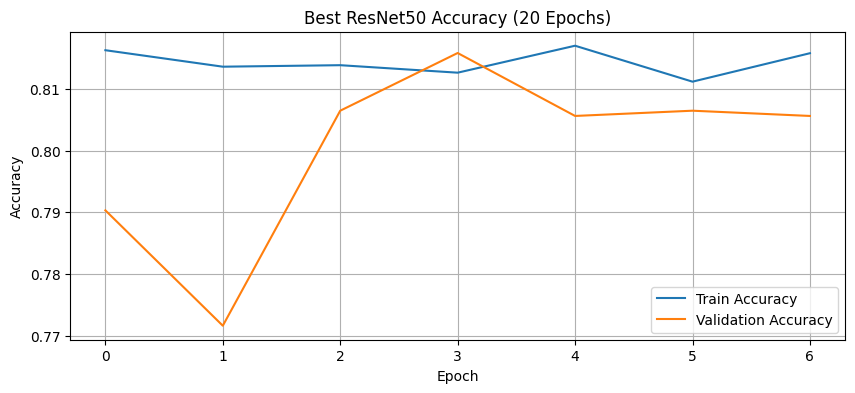

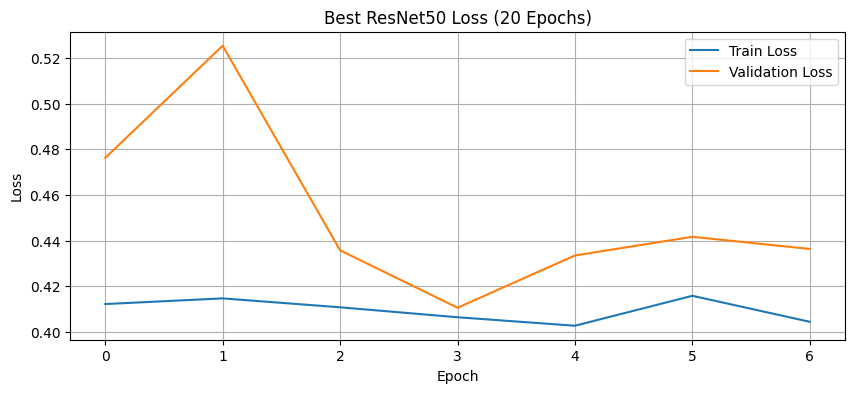

In [ ]:
# Plot training and validation accuracy
plt.figure(figsize=(10,4))
plt.plot(best_history_20.history['accuracy'], label='Train Accuracy')
plt.plot(best_history_20.history['val_accuracy'], label='Validation Accuracy')
plt.title('Best ResNet50 Accuracy (20 Epochs)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot training and validation loss
plt.figure(figsize=(10,4))
plt.plot(best_history_20.history['loss'], label='Train Loss')
plt.plot(best_history_20.history['val_loss'], label='Validation Loss')
plt.title('Best ResNet50 Loss (20 Epochs)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Get the best hyperparameters from the previous tuner search
best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]

best_units = best_hp.get('units')
best_dropout = best_hp.get('dropout')
best_lr = best_hp.get('learning_rate')

print("Using best hyperparameters from tuner:")
print(f"Units: {best_units}, Dropout: {best_dropout}, Learning rate: {best_lr}")

# Using best hyperparameters from tuner:
# Units: 256, Dropout: 0.3, Learning rate: 0.001

Using best hyperparameters from tuner:
Units: 256, Dropout: 0.3, Learning rate: 0.001


19/19 ━━━━━━━━━━━━━━━━━━━━ 13s 463ms/step


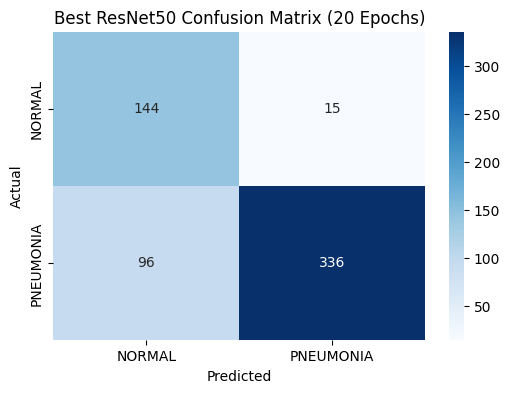

              precision    recall  f1-score   support

      NORMAL       0.60      0.91      0.72       159
   PNEUMONIA       0.96      0.78      0.86       432

    accuracy                           0.81       591
   macro avg       0.78      0.84      0.79       591
weighted avg       0.86      0.81      0.82       591



In [ ]:
# Confusion matrix
y_pred_20 = best_model.predict(test_generator)
y_pred_classes_20 = np.where(y_pred_20 > 0.5, 1, 0)
y_true_20 = test_generator.classes

cm_20 = confusion_matrix(y_true_20, y_pred_classes_20)
plt.figure(figsize=(6,4))
sns.heatmap(cm_20, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Best ResNet50 Confusion Matrix (20 Epochs)')
plt.show()

# Classification report
print(classification_report(y_true_20, y_pred_classes_20, target_names=classes))

19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 292ms/step


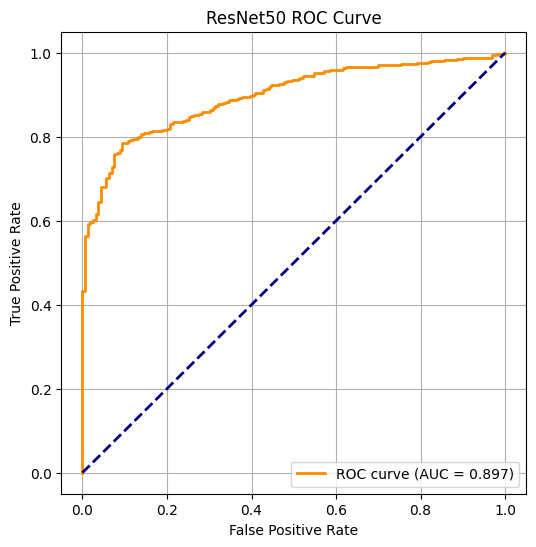

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

# --- Predictions from test set ---
y_true_resnet = test_generator.classes
y_pred_resnet = best_model.predict(test_generator)
y_scores_resnet = y_pred_resnet.ravel()  # flatten for sklearn

# --- ROC Curve ---
fpr, tpr, _ = roc_curve(y_true_resnet, y_scores_resnet)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ResNet50 ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()



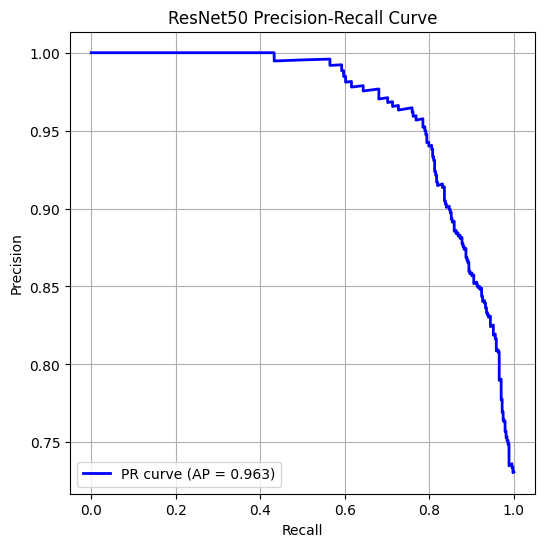

In [ ]:
# --- Precision-Recall Curve ---
precision, recall, _ = precision_recall_curve(y_true_resnet, y_scores_resnet)
ap_score = average_precision_score(y_true_resnet, y_scores_resnet)

plt.figure(figsize=(6,6))
plt.plot(recall, precision, color='blue', lw=2, label=f'PR curve (AP = {ap_score:.3f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('ResNet50 Precision-Recall Curve')
plt.legend(loc="lower left")
plt.grid(True)
plt.show()


DENSENET -20epoch


In [ ]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hypermodel import HyperModel

# Define HyperModel for DenseNet
class DenseNetHyperModel(HyperModel):
    def build(self, hp):
        base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224,224,3))
        for layer in base_model.layers:
            layer.trainable = False

        x = base_model.output
        x = GlobalAveragePooling2D()(x)

        # Tune number of units
        units = hp.Choice('units', [64, 128, 256])
        x = Dense(units, activation='relu')(x)

        # Tune dropout
        dropout_rate = hp.Float('dropout', 0.3, 0.7, step=0.1)
        x = Dropout(dropout_rate)(x)

        output = Dense(1, activation='sigmoid')(x)
        model = Model(inputs=base_model.input, outputs=output)

        # Tune learning rate
        lr = hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])
        model.compile(optimizer=Adam(learning_rate=lr),
                      loss='binary_crossentropy',
                      metrics=['accuracy'])
        return model

# Initialize tuner
tuner_densenet = RandomSearch(
    DenseNetHyperModel(),
    objective='val_accuracy',
    max_trials=5,  # Only 2 trials
    executions_per_trial=1,
    directory='densenet_tuning',
    project_name='pneumonia_densenet'
)

# Run hyperparameter search
tuner_densenet.search(
    train_generator,
    validation_data=val_generator,
    epochs=3,
    class_weight=class_weights_dict
)

# Get the best model
best_model_densenet = tuner_densenet.get_best_models(num_models=1)[0]
best_hp_densenet = tuner_densenet.get_best_hyperparameters(num_trials=1)[0]

print("Best DenseNet hyperparameters:")
print(f"Units: {best_hp_densenet.get('units')}")
print(f"Dropout: {best_hp_densenet.get('dropout')}")
print(f"Learning rate: {best_hp_densenet.get('learning_rate')}")


Trial 5 Complete [00h 05m 22s]
val_accuracy: 0.892190158367157

Best val_accuracy So Far: 0.9329372048377991
Total elapsed time: 00h 26m 49s
Best DenseNet hyperparameters:
Units: 128
Dropout: 0.6000000000000001
Learning rate: 0.001


/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Best DenseNet hyperparameters:
Units: 128
Dropout: 0.6000000000000001
Learning rate: 0.001

In [ ]:
# Base DenseNet
base_model = DenseNet121(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)

# Freeze all base layers
for layer in base_model.layers:
    layer.trainable = False

# Top layers using best hyperparameters
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.6)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
predictions = Dense(1, activation='sigmoid')(x)

# Final model
densenet_model = Model(
    inputs=base_model.input,
    outputs=predictions
)


29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
densenet_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [ ]:
# Callbacks for training
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    min_lr=1e-6
)



In [ ]:
# Train for 20 epochs
history = densenet_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    class_weight=class_weights_dict,
    callbacks=[early_stop, reduce_lr]
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 148s 940ms/step - accuracy: 0.6992 - loss: 0.6312 - val_accuracy: 0.8319 - val_loss: 0.3879 - learning_rate: 0.0010
Epoch 2/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 86s 668ms/step - accuracy: 0.8562 - loss: 0.3630 - val_accuracy: 0.8209 - val_loss: 0.4178 - learning_rate: 0.0010
Epoch 3/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 85s 662ms/step - accuracy: 0.8637 - loss: 0.3177 - val_accuracy: 0.8676 - val_loss: 0.3260 - learning_rate: 0.0010
Epoch 4/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 86s 663ms/step - accuracy: 0.8581 - loss: 0.3175 - val_accuracy: 0.9261 - val_loss: 0.2181 - learning_rate: 0.0010
Epoch 5/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 87s 671ms/step - accuracy: 0.8701 - loss: 0.3254 - val_accuracy: 0.8752 - val_loss: 0.2998 - learning_rate: 0.0010
Epoch 6/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 86s 667ms/step - accuracy: 0.8822 - loss: 0.2858 - val_accuracy: 0.8879 - val_loss: 0.2693 - learning_rate: 0.0010
Epoch 7/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 86s 662ms/step - accuracy: 0.

In [ ]:
# Evaluate DenseNet on test set
test_loss_densenet, test_acc_densenet = densenet_model.evaluate(
    test_generator,
    steps=len(test_generator)
)

print(f"Best DenseNet Test Accuracy (20 Epochs): {test_acc_densenet:.4f}")
print(f"Best DenseNet Test Loss (20 Epochs): {test_loss_densenet:.4f}")


19/19 ━━━━━━━━━━━━━━━━━━━━ 16s 871ms/step - accuracy: 0.9232 - loss: 0.2493
Best DenseNet Test Accuracy (20 Epochs): 0.9188
Best DenseNet Test Loss (20 Epochs): 0.2394


Best DenseNet Test Accuracy (20 Epochs): 0.9205
Best DenseNet Test Loss (20 Epochs): 0.2353

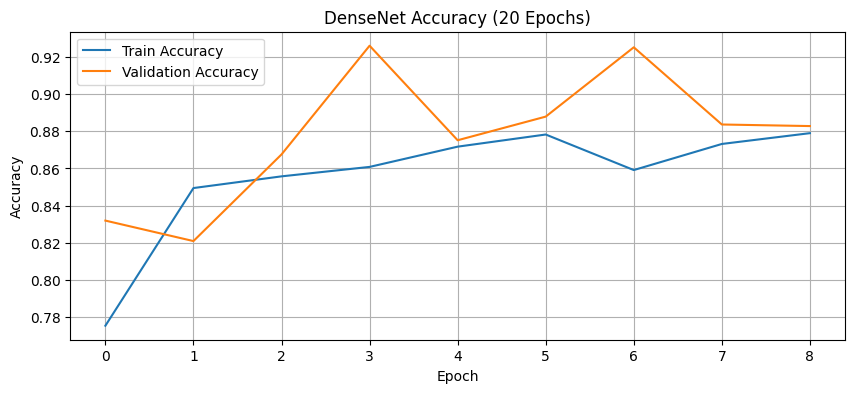

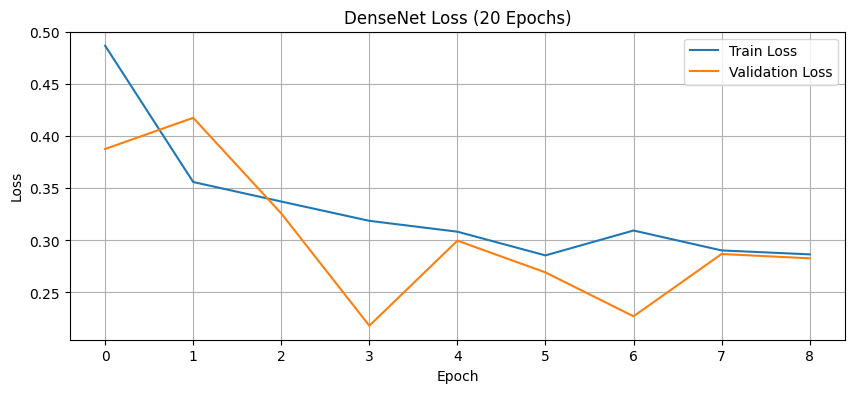

In [ ]:
# Plot training & validation accuracy
plt.figure(figsize=(10,4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('DenseNet Accuracy (20 Epochs)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot training & validation loss
plt.figure(figsize=(10,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('DenseNet Loss (20 Epochs)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


19/19 ━━━━━━━━━━━━━━━━━━━━ 27s 882ms/step


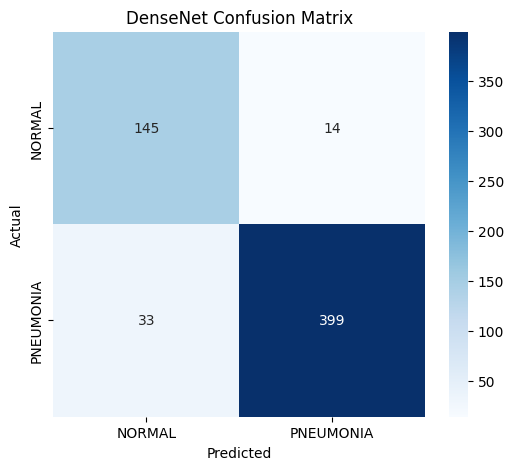

Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.81      0.91      0.86       159
   PNEUMONIA       0.97      0.92      0.94       432

    accuracy                           0.92       591
   macro avg       0.89      0.92      0.90       591
weighted avg       0.93      0.92      0.92       591



In [ ]:
# Get true labels and predictions
y_true = test_generator.classes  # true labels
y_pred_prob = densenet_model.predict(test_generator, steps=len(test_generator))
y_pred = (y_pred_prob > 0.5).astype(int).reshape(-1)  # threshold 0.5 for binary

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('DenseNet Confusion Matrix')
plt.show()

# Optional: Classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))


19/19 ━━━━━━━━━━━━━━━━━━━━ 28s 881ms/step


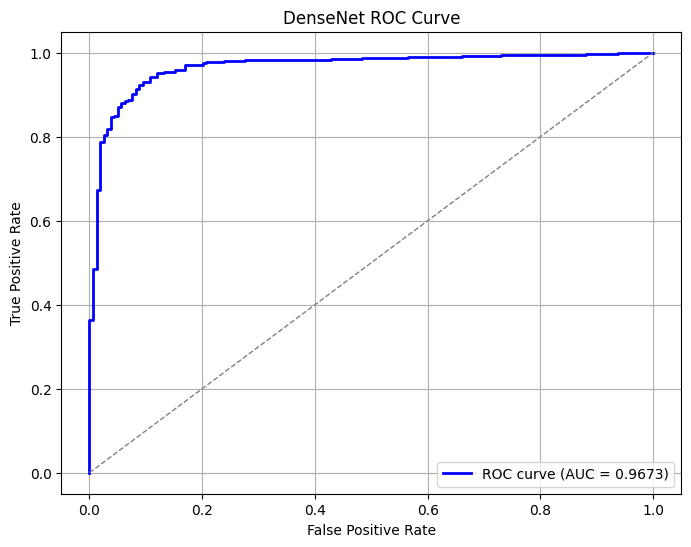

In [ ]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class
y_pred_proba = best_model_densenet.predict(test_generator)  # shape (num_samples, 1)

# True labels
y_true = test_generator.classes  # shape (num_samples,)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('DenseNet ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 298ms/step


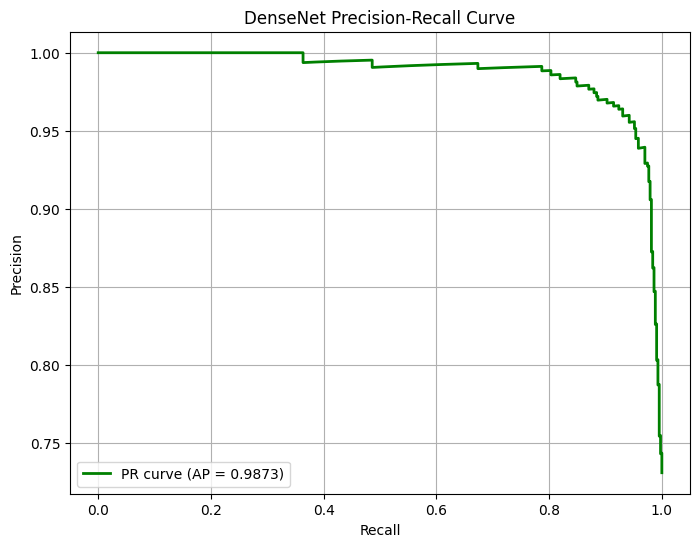

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
import numpy as np

# Predicted probabilities for the positive class
y_pred_proba = best_model_densenet.predict(test_generator)  # shape (num_samples, 1)

# True labels
y_true = test_generator.classes  # shape (num_samples,)

# Compute precision-recall curve and average precision
precision, recall, thresholds = precision_recall_curve(y_true, y_pred_proba)
avg_precision = average_precision_score(y_true, y_pred_proba)

# Plot PR curve
plt.figure(figsize=(8,6))
plt.plot(recall, precision, color='green', lw=2, label=f'PR curve (AP = {avg_precision:.4f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('DenseNet Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()
